<a href="https://colab.research.google.com/github/DBCooper200/major_project/blob/main/resnet_modified_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  1 11:50 kaggle.json


In [3]:
'''
from google.colab import drive
drive.mount('/content/drive')'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')"

In [4]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [5]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d himanshuagarwal1998/glaucomadataset

100% 2.54G/2.54G [02:05<00:00, 23.4MB/s]
100% 2.54G/2.54G [02:05<00:00, 21.8MB/s]


In [7]:
!unzip -q /content/glaucomadataset.zip

In [8]:
!mkdir 'Data_set'

In [9]:
import shutil, sys
shutil.move("/content/Non Glaucoma", "/content/Data_set")

'/content/Data_set/Non Glaucoma'

In [10]:
shutil.move("/content/Glaucoma", "/content/Data_set")

'/content/Data_set/Glaucoma'

In [11]:
'''FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
'''

'FAST_RUN = False\nIMAGE_WIDTH=128\nIMAGE_HEIGHT=128\nIMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)\nIMAGE_CHANNELS=3\n'

In [12]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.preprocessing import image
import os
import cv2
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')

In [13]:
path = ['/content/Data_set/Non Glaucoma', '/content/Data_set/Glaucoma']
images = []
labels = []
for n,i in enumerate(path):
    for j in tqdm(os.listdir(i)):
        img_path = os.path.join(i,j)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (64,64))
        images.append(img)
        labels.append(n)
images = np.array(images)/255
labels = np.array(labels)

100%|██████████| 511/511 [00:10<00:00, 49.04it/s]


In [14]:
for n in enumerate(path):
  print(n)

#the labels assigned are 
# 0 for non glaucomic images
# 1 for glaucomic images

(0, '/content/Data_set/Non Glaucoma')
(1, '/content/Data_set/Glaucoma')


In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images, labels = shuffle(images, labels, random_state=32)
x_train, x_valid, y_train, y_valid = train_test_split(images, labels, test_size=0.15, random_state=44)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=40)

In [16]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True, vertical_flip=True,
                            fill_mode='constant', cval=0.)
train_gen = datagen.flow(x_train, y_train, batch_size=32)
#Using TensorFlow backend.

#for test set
test_gen = datagen.flow(x_test, y_test, batch_size = 32)

In [17]:
HEIGHT = 64
WIDTH = 64
BATCH_SIZE = 32

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import classification_report
import plotly.express as px
import pandas as pd

In [19]:
IMAGE_SIZE = (64,64)

In [20]:
resnet =ResNet50(weights= None, include_top=False, input_shape= (HEIGHT,WIDTH,3))

In [21]:
from keras.optimizers import SGD, Adam
from keras.layers import Dropout,Dense, GlobalAveragePooling2D
x = x = layers.Flatten()(resnet.output)
predictions = Dense(1,activation= 'sigmoid')(x)
model = Model(inputs = resnet.input, outputs = predictions)
adam=keras.optimizers.Adam(
   learning_rate = 0.0001
)
model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
tb_callback = tensorflow.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.fit_generator(train_gen, epochs=100, steps_per_epoch=1,verbose=1, validation_data=(x_valid,y_valid),callbacks=[tb_callback])

Epoch 1/100
1/1 [==============================] - 24s 24s/step - loss: 1.9619 - accuracy: 0.3125 - val_loss: 0.6937 - val_accuracy: 0.4610
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 2.3791 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.4416
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 1.3992 - accuracy: 0.6562 - val_loss: 0.6938 - val_accuracy: 0.3052
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 5.2805 - accuracy: 0.0000e+00 - val_loss: 0.6930 - val_accuracy: 0.5779
Epoch 5/100
1/1 [==============================] - 6s 6s/step - loss: 0.8846 - accuracy: 0.5625 - val_loss: 0.6926 - val_accuracy: 0.5390
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 1.1686 - accuracy: 0.6875 - val_loss: 0.6923 - val_accuracy: 0.5390
Epoch 7/100
1/1 [==============================] - 6s 6s/step - loss: 1.3296 - accuracy: 0.3438 - val_loss: 0.6921 - val_accuracy: 0.5390
Epoch 8/100
1/1 [===========

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [25]:
pred = model.evaluate(x_test, y_test)

5/5 [==============================] - 1s 265ms/step - loss: 0.6998 - accuracy: 0.4504


In [26]:
!tensorboard dev upload --logdir logs 

2023-06-01 12:09:35.506666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   XPPJ-THPY


Upload started and will continue reading any new data as it's added to the logdir.

To stop 

In [28]:
model.save('path_to_my_model.h5')

# Recreate the exact same model purely from the file
new_model = keras.models.load_model('path_to_my_model.h5')

Text(0, 0.5, 'value indicating true or false(green->actual value, red->predicted value by model)')

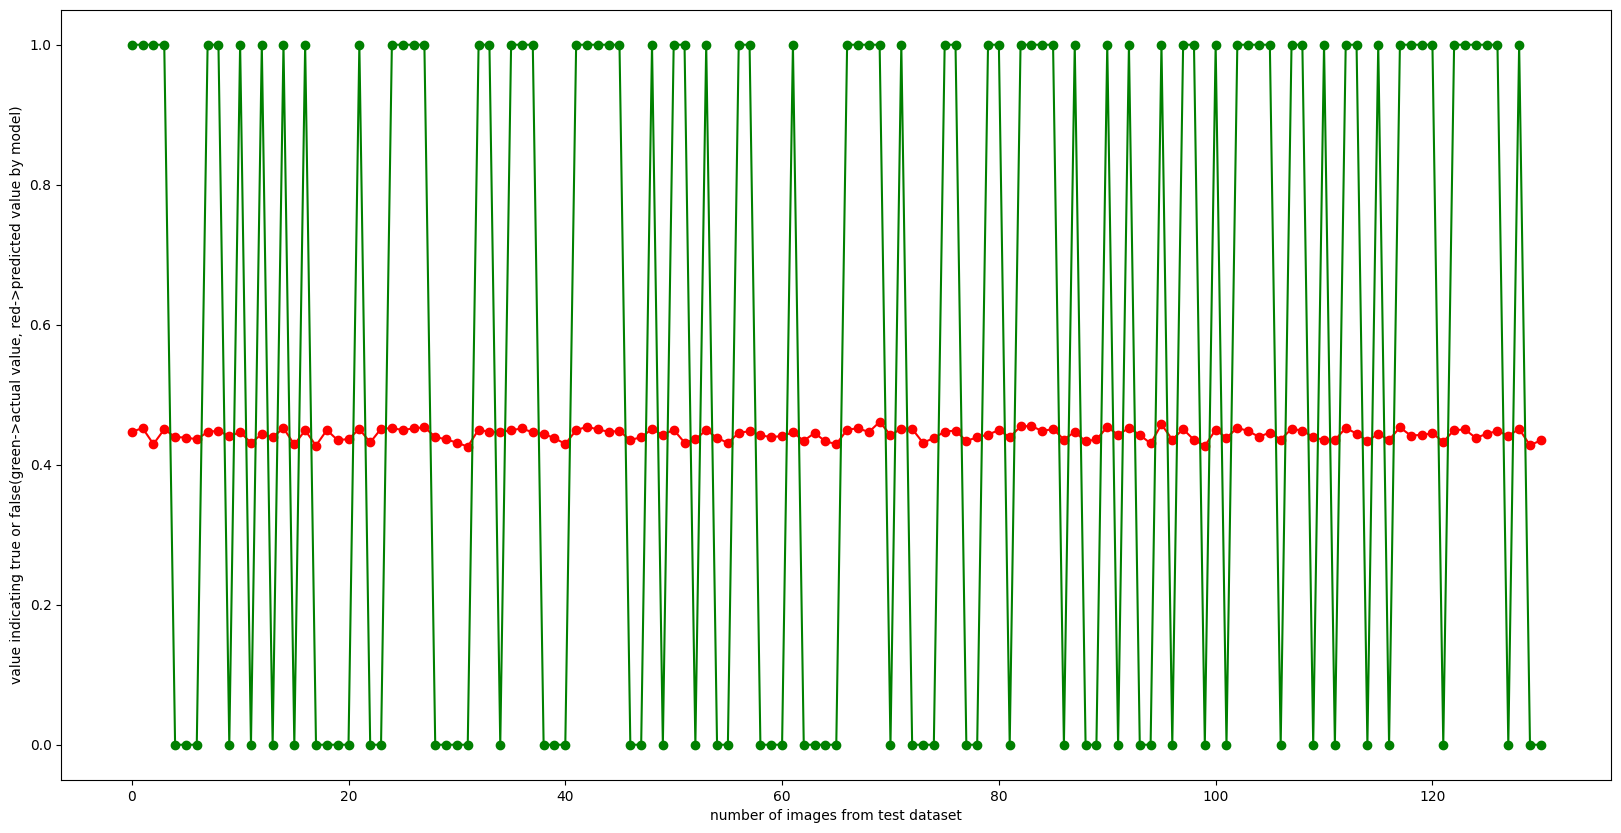

In [29]:
y_test_predicted=[]
for i in range(len(x_test)):
  res_test_imag = image.img_to_array(x_test[i])
  res_test_imag = np.expand_dims(res_test_imag, axis = 0)
  y_test_predicted.append(new_model.predict(res_test_imag,verbose=None))
y_test_predicted=np.array(y_test_predicted)
     

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20.0,10.0))
x_axis = len(x_test)
y_test_predicted_flattened=y_test_predicted.ravel()
y_test_flattened=y_test.ravel()
plt.plot(y_test_predicted_flattened,marker='o',color='red')
plt.plot(y_test_flattened,marker='o',color='green');
plt.xlabel('number of images from test dataset')
plt.ylabel("value indicating true or false(green->actual value, red->predicted value by model)")
#green->actual value
#red->predicted value by model

In [35]:
test_image_index=1
img=x_test[test_image_index]
#for i in range(10):
#s="/content/Data_set/Glaucoma/image13"+str(i)+"prime.tif"
#s="/content/Data_set/Non Glaucoma/image101prime.png"
#img = image.load_img(s, target_size = (64, 64))
test_image=img
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result_floatvalue = new_model.predict(test_image)
#>0.5->glaucoma
#<0.5->non glaucoma

1/1 [==============================] - 0s 25ms/step


In [37]:
if result_floatvalue>=0.5:
  result_intvalue=1
else:
  result_intvalue=0
#1->glaucoma
#0->non glaucoma
#this output is predicted by the model

In [38]:
print("the actual value is "+str(y_test[test_image_index]))
print("the predicted value by the model is "+str(result_floatvalue))
print("the predicted value converted to int is "+str(result_intvalue))

the actual value is 1
the predicted value by the model is [[0.45242375]]
the predicted value converted to int is 0


Text(0.5, 1.0, 'actual glaucomic image\npredicted as non glaucomic image')

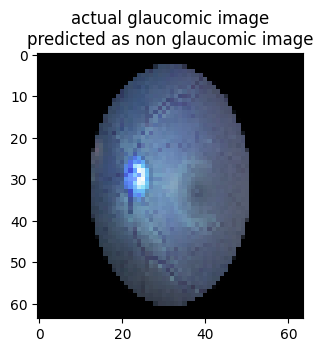

In [39]:
plt.figure(figsize=(20,20))
plt.subplot(5,5,1)
plt.imshow(x_test[test_image_index])
#plt.imshow(x_test[test_image_index])
if y_test[test_image_index]==0:
  name="actual non glaucomic image"
else:
  name="actual glaucomic image"

if result_intvalue==0:
  name1="predicted as non glaucomic image"
else:
  name1="predicted as glaucomic image"
plt.title(name+"\n"+name1)
     

Text(0, 0.5, 'red->predicted value by model')

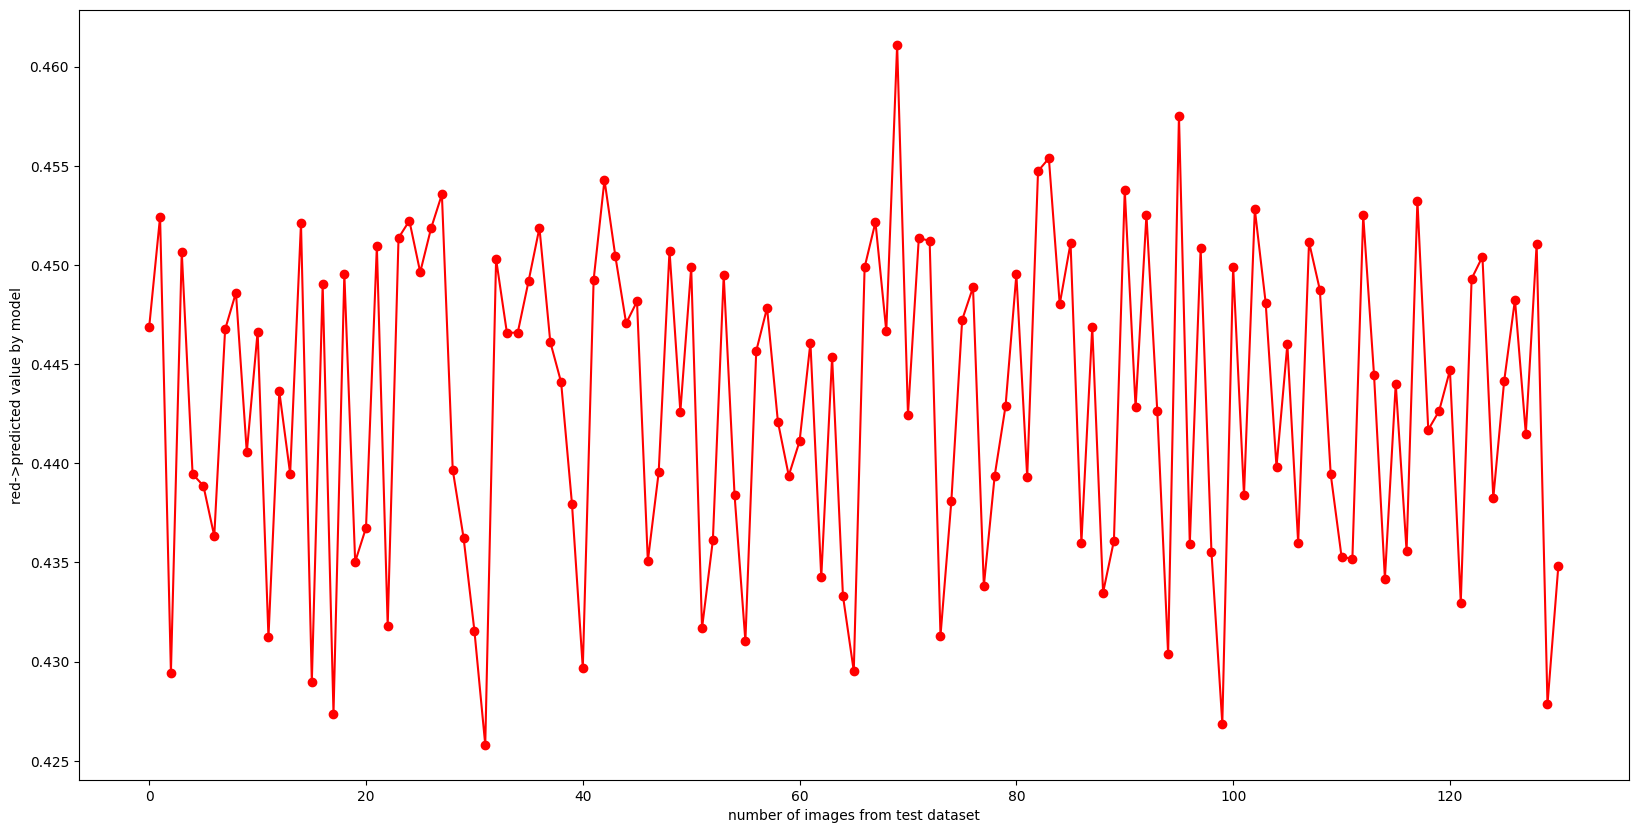

In [48]:
y_test_predicted_new=[]
for i in range(len(x_test)):
  res_test_imag = image.img_to_array(x_test[i])
  res_test_imag = np.expand_dims(res_test_imag, axis = 0)
  y_test_predicted_new.append(new_model.predict(res_test_imag,verbose=None))
y_test_predicted_new=np.array(y_test_predicted_new)
     

%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20.0,10.0))
x_axis = len(x_test)
y_test_predicted_flattened=y_test_predicted_new.ravel()
#y_test_flattened=y_test.ravel()
plt.plot(y_test_predicted_flattened,marker='o',color='red')
#plt.plot(y_test_flattened,marker='o',color='green');
plt.xlabel('number of images from test dataset')
plt.ylabel("red->predicted value by model")
#green->actual value
#red->predicted value by model